
```
---
title: Insult Classifcation
type:  lesson + lab + demo
duration: "1:25"
creator:
    name: David Yerrington
    city: SF
---
```
<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; width: 50px; margin: 10px">

#  Naive Bayes Demo / Lab + NLP
Week 8 | 4.3

![](https://snag.gy/i5b9BX.jpg)

In this dataset, we will be looking at labeled comments that look something like this:

> <div style="float: left; margin-right: 20px;"><img src="https://snag.gy/xX9hMZ.jpg" style="float: left; margin-right: 10px; width: 60px;">**Moon Master99BBQ**<br>Insult Connoisseur</div>"You're all upset, defending this hipster band...and WE'RE the douches for reading the news and discussing it?  Put down the PBR, throw away the trucker hat, shave off that silly shadow-beard, put down your "99%er" sign, and get a job, ION."

Fair warning, the content is fairly provacative but this type of problem is very common in the continuum of comment threads throughout the web.  You can also use this type of pipeline to build custom sentiment features for content specific domains that can be much more effecive than say TextBlob, for relatively low effort.


In [2]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

from sklearn.pipeline import Pipeline

%matplotlib inline

sns.set_style("darkgrid")

/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
insults_df = pd.read_csv("assets/datasets/train.csv", encoding="utf-8")

*There are a variety of colorful expletives observed throughout this dataset.  This activity is strictly educational though and you should excersize critical thinking dispite the potentail comedic nature of the content.*

In [4]:
insults_df.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [6]:
############
# DO NOT USE THIS CODE FOR COUNTING TOKENS!!!!
################

# import pandas as pd

# cvt = CountVectorizer(strip_accents='unicode', stop_words="english", ngram_range=(2,4))
# X_all = cvt.fit_transform(insults_df['Comment'])
# # X_all.toarray()
# # cvt.get_feature_names()

# sorted( 
#     zip(
#         cvt.vocabulary_.keys(), # <--- the previous verions uses cvt.vocabulary_.keys() which is a dictionary 
#         pd.DataFrame(
#             X_all.todense(), 
#             columns=cvt.get_feature_names()).T.sum()
#     ), 
#     key      =  lambda item: item[1],
#     reverse  =  True
# )


######
#  Use this code instead for exploring counts
#########
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(2,4))
X_all    =  cvt.fit_transform(insults_df['Comment'])
columns  =  cvt.get_feature_names()

x_df     =  pd.DataFrame(X_all.toarray(), columns=columns)
tf_df    =  pd.DataFrame(x_df.sum(), columns=["freq"])
tf_df.sort_values("freq", ascending=False).head(10)


[(u'existing', 1508),
 (u'fiasco', 1013),
 (u'prostituted', 429),
 (u'truce', 398),
 (u'obsessively', 390),
 (u'merchants', 384),
 (u'funnier', 384),
 (u'dumbest', 372),
 (u'purposes', 309),
 (u'stops', 282),
 (u'discussing', 276),
 (u'irresponsible', 276),
 (u'droning', 259),
 (u'replace', 254),
 (u'marxists', 254),
 (u'hookers', 250),
 (u'rapidly', 240),
 (u'dimwit', 226),
 (u'outlet', 225),
 (u'boarder', 219),
 (u'sneering', 217),
 (u'credit', 213),
 (u'argentines', 206),
 (u'giants', 195),
 (u'knit', 192),
 (u'inadvertently', 190),
 (u'u2014', 179),
 (u'welfarecheese', 178),
 (u'legislatures', 175),
 (u'slander', 172),
 (u'nblow', 171),
 (u'specifically', 160),
 (u'lamar', 159),
 (u'psychopaths', 159),
 (u'systematic', 155),
 (u'sniffing', 155),
 (u'merit', 154),
 (u'meri', 150),
 (u'zdiets', 149),
 (u'utstr', 146),
 (u'planned', 145),
 (u'govermet', 143),
 (u'gdlow', 137),
 (u'sweetheart', 134),
 (u'campus', 133),
 (u'stoopid', 127),
 (u'jasonhairydawg', 126),
 (u'teacher', 125),


### 1. Explore a list of comment words that occur more than 50x
Plot a histogram of some kind might be helpful.

In [70]:
cvt = CountVectorizer()
X_all = cvt.fit_transform(insults_df["Comment"])

## Complete your code -- observe the desired output already below frame

### 1.5 Try it again with stopword removal 

In [1]:
import re, urllib

# Ignore this -- wanted to mine links inside of these "bad" insult comments
# def mine_links(val):
#     GRUBER_URLINTEXT_PAT = re.compile(ur'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
#     print GRUBER_URLINTEXT_PAT.findall(val)
    
# insults_df["Comment"].map(mine_links)


In [72]:
cvt = CountVectorizer(stop_words="english")
X_all = cvt.fit_transform(insults_df["Comment"])

# Finish code

### 2. Explore ngrams between 2 and 4
Display the top 75 ngrams with frequencies.  Look at each class to see how they are same / different.

In [166]:
cvt = CountVectorizer? # look up the appropriate parameters


[(u'xc2 xa0', 379), (u'xe2 x80', 209), (u'xa0 xa0', 144), (u'http shar', 68), (u'http shar es', 68), (u'shar es', 68), (u'trade trade', 63), (u'trade trade trade', 62), (u'u2026 u2026', 59), (u'xa0 xa0 xa0', 57), (u'u2026 u2026 u2026', 52), (u'xc2 xa0 xc2', 46), (u'xa0 xc2', 46), (u'don know', 43), (u'x80 x99s', 41), (u'xe2 x80 x99s', 41), (u'xa0 xc2 xa0', 35), (u'look like', 35), (u'bit ly', 34), (u'x80 x9d', 34), (u'xe2 x80 x9d', 34), (u'bit ly mrzlgv', 32), (u'gay marriage', 32), (u'ly mrzlgv', 32), (u'x80 x99t', 30), (u'xe2 x80 x99t', 30), (u'http bit', 28), (u'http bit ly', 28), (u'looks like', 26), (u'just like', 24), (u'ly mrzlgv http', 24), (u'mrzlgv http', 24), (u'xa0 just', 23), (u'people like', 23), (u'united states', 23), (u'sound like', 23), (u'don like', 20), (u'don think', 19), (u'mrzlgv http shar', 18), (u'nhttp www', 18), (u'ha ha', 17), (u'ron paul', 17), (u'don understand', 17), (u'xa0 don', 17), (u'fox news', 16), (u'democrat representative', 16), (u'years ago', 15)

### 3. (Optional) try expanding the list of stopwords
There's definitely some extra crap floating around our lovely ngrams like xa0, x80, web urls, and a bunch of other things.  If you could remove them, this could help us improve the score.  Identify words / tokens that don't add much value to either class.  **You should additionally look at ngrams per class (insults vs non-insults) to fine tune your preprocessing.  This has the greatest potential to improve your results without tuning any model parameters.**

Using `nltk.corpus`, we can get a baseline list of stop words.  Try to expand it and pass it to our vectorizer.

In [74]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


### 4. Setup a test / train split of your data using any method you wish.
Try 70/30 to start.

(2762, 1960)

### 5. Setup a "Pipeline" to vectorize and use MultinomialNB classifier.
Check out our last lab to set this up.  Use lowercase, strip_accents, and optionally your updated stop_words.  Fit your comment data using your "Insult" feature as your response.

Fit your training data to your pipeline, then score it.

In [76]:
# Here's the code -- you can adapt it from here on out.
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 
pipeline.fit(insults_df["Comment"], insults_df["Insult"])

# don't forget to score

Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...False,
         use_idf=True)), ('cls', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### 5.5a Swap out MultinomialNB with BernoulliNB in the pipeline
How do they compare?

### 5.5a Also try logistic regression, and random forrests in the pipeline
How do they compare?

#### 5.5b Also try tweeking the paramters of CountVectorizer and TfidfTranformer.

Remove Tfidf also. Good / bad?

### 6. Check your score.
Also, run a classification report and [plot AUC/ROC](../../week-04/2.3-evaluating_model_fit/code/AUC-ROC-codealong.ipynb).  Also, [review classfication reporting metrics](../../week-04/4.3-advanced-model_evaluation/code/starter-code/week4-4.1-classification-report.ipynb).

In [77]:
print classification_report(target_names=["Insult", "Neutral"]) # update the code to display the classification report

TypeError: classification_report() takes at least 2 arguments (1 given)

### Revisiting:  Learning Curves

![](https://snag.gy/GoUvNw.jpg)

We touched on this briefly in the past but lets reprise the idea of sample size effect on validation score.  How do we know the optimal sample size to train and test on?  We can examine the scores of training and cross validation given a number of samples.  Plotting the scores is a great way to understand:

- How to improve bias / generalization (out of sample prediction)
- Generally how many samples you might need
- The bounds of your models performance 

Generally, the learning curves represent the number of samples that have been used, the average scores on the training sets and the average scores on the validation sets.  

See also [validation curves](http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#example-model-selection-plot-validation-curve-py) for model parameter *(aka: hyper parameter)* tuning, also [calibration plots](http://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html).

In [78]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

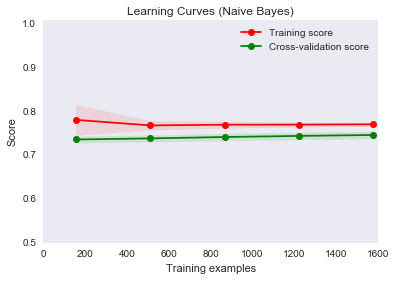

In [80]:
# Pipeline variable can be replaced by your already established estimator
cv = ShuffleSplit(insults_df.shape[0], n_iter=100, test_size=0.6, random_state=0)
plot_learning_curve(pipeline, "Learning Curves (Naive Bayes)", insults_df['Comment'], insults_df['Insult'], ylim=(0.5, 1.01), cv=cv, n_jobs=4)


### 6.5 Check out your baseline.

What is the chance that you will randomly guess correctly without any modeling? Insult vs neutral.

### 7. Check the accuracy of your model with the holdout dataset "test_with_solutions.csv"

Using the `test_with_solutions.csv`, we will test our model on another set of data it has never seen before.  Also plot the same eval metrics (classification report, AUC/ROC).

In [174]:
holdout_df = pd.read_csv("assets/datasets/test_with_solutions.csv", encoding="utf-8")


### 8. What is your model not getting right?

Check out false positives and true negatives.  Any noticable patterns?  Pay particular attention to the recall metric.  What might be done in preprocessing steps to improve accuracy?  

- Try to improve with your **preprocessing first**
- THEN try to tweek your **parameters to your model(s)**

## Lastly...

Check [this blog post](http://webmining.olariu.org/my-first-kaggle-competition-and-how-i-ranked/) by a guy who used SVM, a "neural network", a ton of cleaning, then placed 3rd in a Kaggle competition featuing this same dataset.  Given that you used a few basic techniques with preprocessing text and Naive Bayes, what do think about the tradeoffs of simplicity vs complexity of your model?

#### Where Next?

If you're interested in this type of problem, a great area to read up on is sentiment analysis.  This [Kaggle dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data) is an excellent opportunity to practice more.  Also these whitepapers are great places to expand on this topic:

- [Fast and accurate sentiment classification using an
enhanced Naive Bayes model](http://arxiv.org/pdf/1305.6143.pdf) *Great overview!*
- [Sarcasm Detection](http://www.aclweb.org/anthology/P15-2124)
- [Making Computers Laugh:
Investigations in Automatic Humor Recognition](http://www.aclweb.org/anthology/H05-1067)
- [Modelling Sarcasm in Twitter, a Novel Approach](http://www.aclweb.org/anthology/W14-2609)
- [RUNNING HEAD: NARCISSISM AND LIE DETECTION](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/107345/zarins.finalthesis.pdf?sequence=1) *The study metrics are interesting*